In [16]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Movie-Ratings.csv')

In [18]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


# Rename Columns

In [19]:
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [20]:
df = df.rename(columns={'Film': 'film', 'Genre': 'genre', 'Rotten Tomatoes Ratings %': 'critic_rating', 'Audience Ratings %': 'audience_rating', 'Budget (million $)': 'budget', 'Year of release': 'year'})

In [21]:
df['genre'] = df.genre.astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
film               559 non-null object
genre              559 non-null category
critic_rating      559 non-null int64
audience_rating    559 non-null int64
budget             559 non-null int64
year               559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 22.8+ KB


# Jointplots

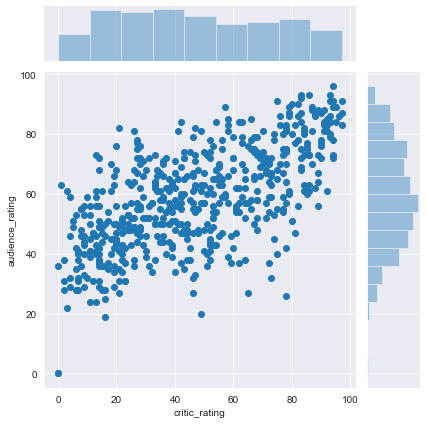

In [38]:
rcParams['figure.figsize'] = 12, 6
j = sns.jointplot(data=df, x='critic_rating', y='audience_rating')

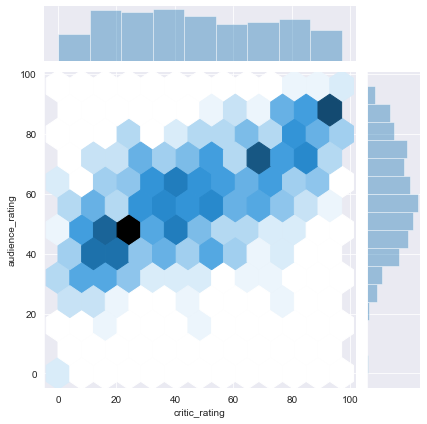

In [39]:
j = sns.jointplot(data=df, x='critic_rating', y='audience_rating', kind='hex')

# Histograms

Text(0.5, 1.0, 'Audience Ratings')

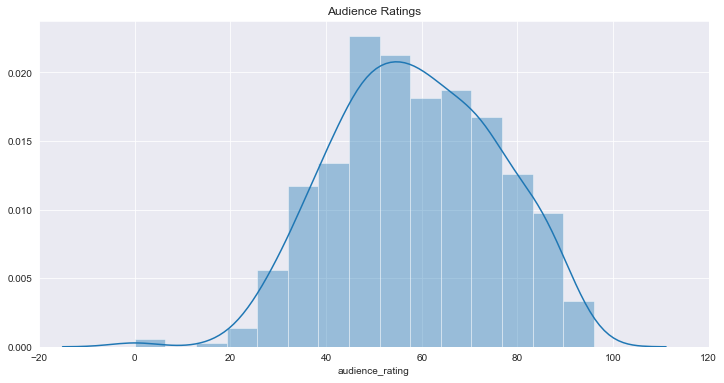

In [40]:
sns.set_style('darkgrid')
m1 = sns.distplot(df['audience_rating'], bins=15)
plt.xlim(-20, 120)
plt.title('Audience Ratings')

Text(0.5, 1.0, 'Critic Ratings')

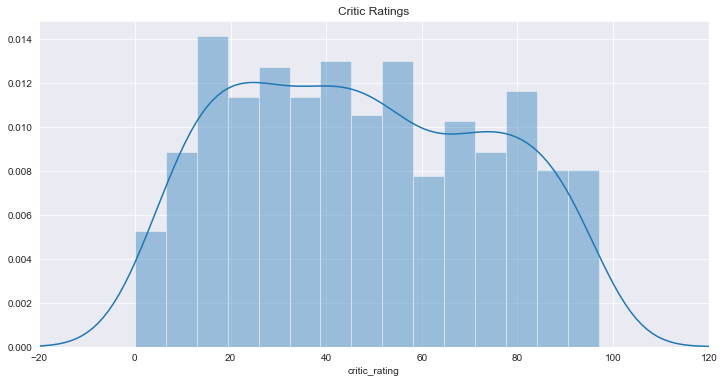

In [41]:
m2 = sns.distplot(df.critic_rating, bins=15)
plt.xlim(-20, 120)
plt.title('Critic Ratings')

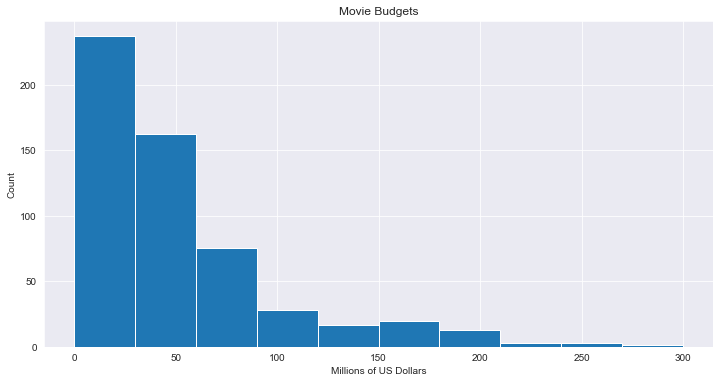

In [42]:
plt.hist(df.budget)

plt.title('Movie Budgets')
plt.xlabel('Millions of US Dollars')
plt.ylabel('Count')
plt.show()

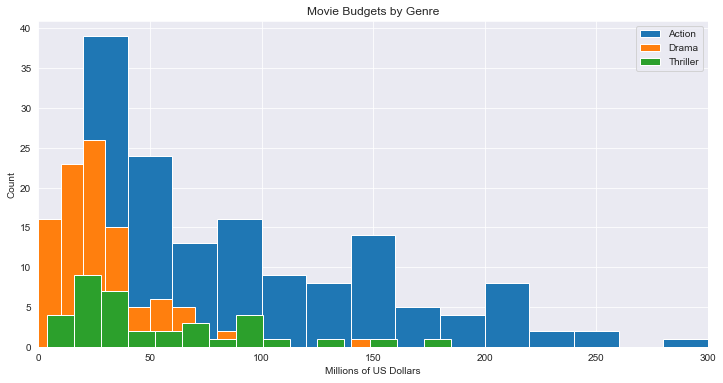

In [43]:
# subset genres

plt.hist(df[df['genre'] == 'Action'].budget, bins=15, label='Action')
plt.hist(df[df['genre'] == 'Drama'].budget, bins=15, label='Drama')
plt.hist(df[df['genre'] == 'Thriller'].budget, bins=15, label='Thriller')


plt.title('Movie Budgets by Genre')
plt.xlabel('Millions of US Dollars')
plt.ylabel('Count')
plt.xlim(0,300)
plt.legend()
plt.show()

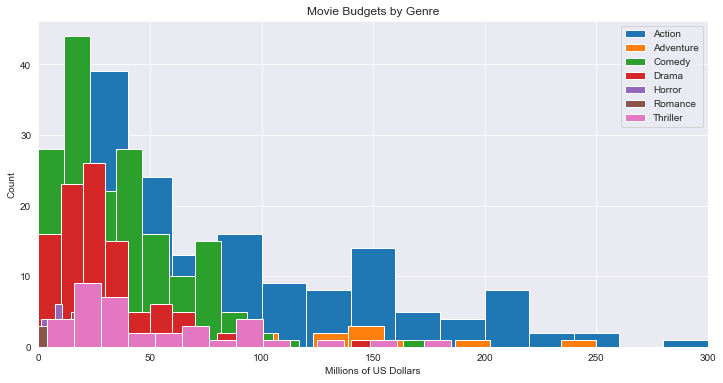

In [37]:
# loop through the genres

for gen in df.genre.cat.categories:
    plt.hist(df[df['genre'] == gen].budget, bins=15, label=gen)
    
plt.title('Movie Budgets by Genre')
plt.xlabel('Millions of US Dollars')
plt.ylabel('Count')
plt.xlim(0,300)
plt.legend()
plt.show()

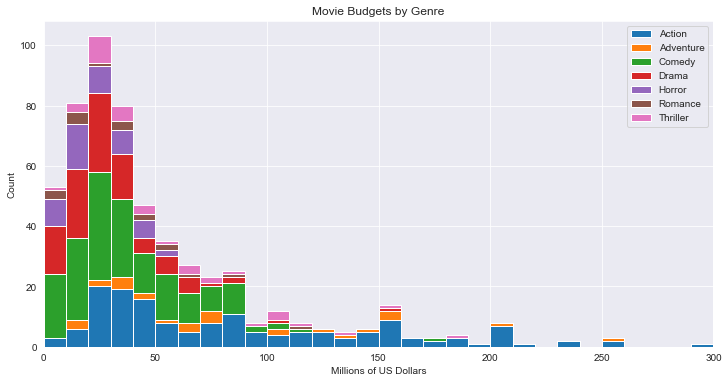

In [44]:
# loop through the genres, stacked histogram

list1 = list()
mylabels = list()
for gen in df.genre.cat.categories:
    list1.append(df[df['genre'] == gen].budget)
    mylabels.append(gen)

plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.title('Movie Budgets by Genre')
plt.xlabel('Millions of US Dollars')
plt.ylabel('Count')
plt.xlim(0,300)
plt.legend()
plt.show()

# KDE Plot

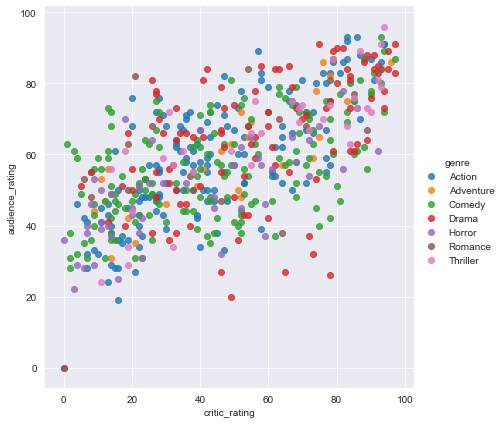

In [50]:
vis1 = sns.lmplot(data=df, x='critic_rating', y='audience_rating', \
                  fit_reg=False, hue='genre', \
                  size=6, aspect=1)